## 1. Import Libraries

In [9]:
import pandas as pd
import numpy as np

from xgboost import XGBClassifier
import shap
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


## 2. Load Final Engineered Dataset

In [10]:
df=pd.read_csv('../data/processed/credit_final_engineered.csv')
X = df.drop("default payment next month", axis=1)
y = df["default payment next month"]


## 3. Load Your Final Saved Model

In [11]:
final_xgb=XGBClassifier()
final_xgb.load_model('../models/final_xgb_model.json')

## 4. SHAP Global Explainability

In [12]:
import numpy as np
from sklearn.impute import SimpleImputer

# Clean data
X_clean = X.replace([np.inf, -np.inf], np.nan)

imputer = SimpleImputer(strategy="median")
X_clean = imputer.fit_transform(X_clean)
X_clean = pd.DataFrame(X_clean, columns=X.columns)

# Initialize SHAP
explainer = shap.TreeExplainer(final_xgb, feature_perturbation="tree_path_dependent")

# Compute SHAP values
shap_values = explainer.shap_values(X_clean)


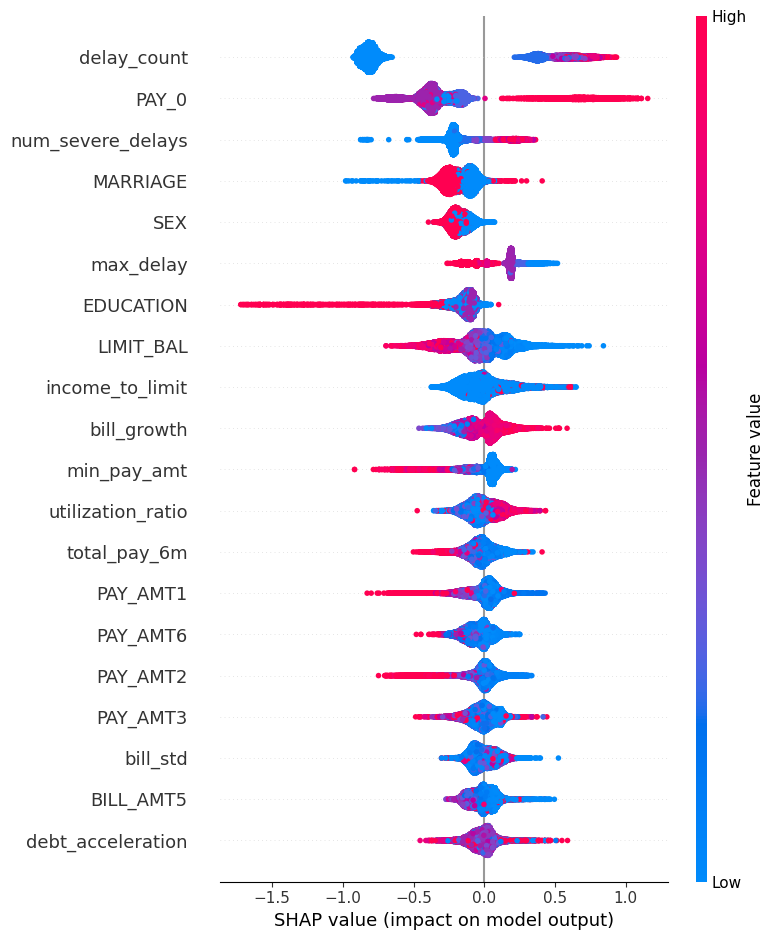

In [13]:
shap.summary_plot(shap_values, X_clean, plot_type="dot", max_display=20)


## 5. SHAP Local Explainability

In [14]:
customer_index = 10


In [15]:
X_clean.iloc[customer_index]


LIMIT_BAL              200000.000000
SEX                         2.000000
EDUCATION                   3.000000
MARRIAGE                    2.000000
AGE                        34.000000
PAY_0                       0.000000
PAY_2                       0.000000
PAY_3                       2.000000
PAY_4                       0.000000
PAY_5                       0.000000
PAY_6                      -1.000000
BILL_AMT1               11073.000000
BILL_AMT2                9787.000000
BILL_AMT3                5535.000000
BILL_AMT4                2513.000000
BILL_AMT5                1828.000000
BILL_AMT6                3731.000000
PAY_AMT1                 2306.000000
PAY_AMT2                   12.000000
PAY_AMT3                   50.000000
PAY_AMT4                  300.000000
PAY_AMT5                 3738.000000
PAY_AMT6                   66.000000
max_delay                   2.000000
avg_delay                   0.166667
delay_count                 1.000000
total_bill_6m           34467.000000
a

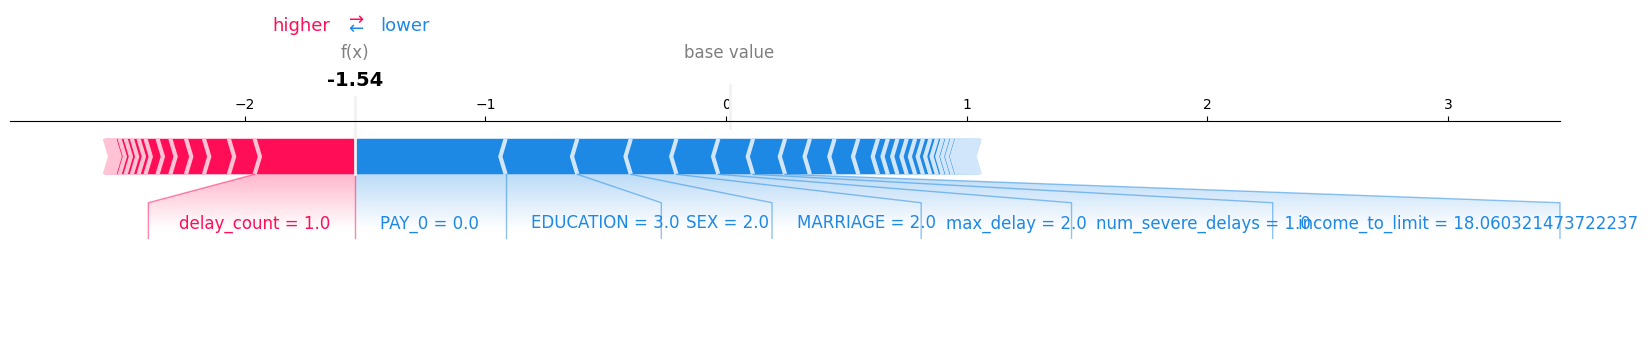

In [16]:
shap.force_plot(
    explainer.expected_value,
    shap_values[customer_index],
    X_clean.iloc[customer_index],
    matplotlib=True
)


In [17]:
proba = final_xgb.predict_proba([X_clean.iloc[customer_index]])[0][1]
print("Default Probability:", proba)


Default Probability: 0.1762631


In [21]:
final_xgb.predict([X_clean.iloc[customer_index]])

array([0])